Material for the book [Probability and Statistics for Data Science](https://a.co/d/cAss9mO). A free preprint, videos, code, slides and solutions to exercises are available at https://www.ps4ds.net/

Code for Figure 8.8

Demonstration that uncorrelation implies independence for Gaussian random vectors\
Topics: [Gaussian random vector](https://www.youtube.com/watch?v=adr_EwRaLbk), [uncorrelation and independence](https://www.youtube.com/watch?v=t9TNCYYK8ck), [Gaussian conditionals](https://www.youtube.com/watch?v=NT-CpmEcQWQ)

Author: Carlos Fernandez-Granda

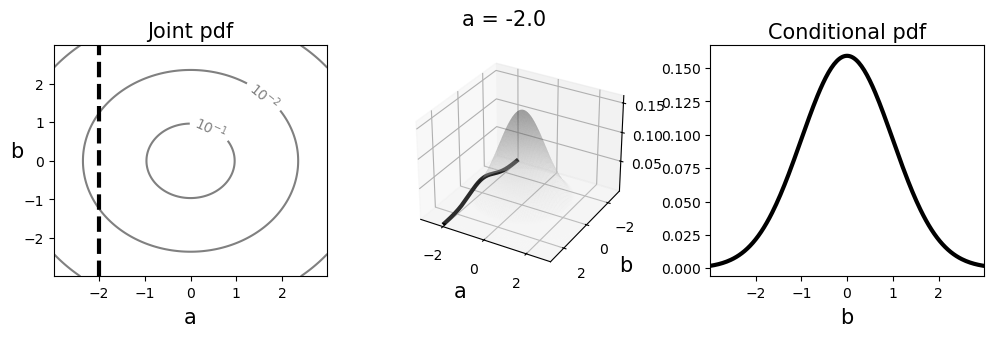

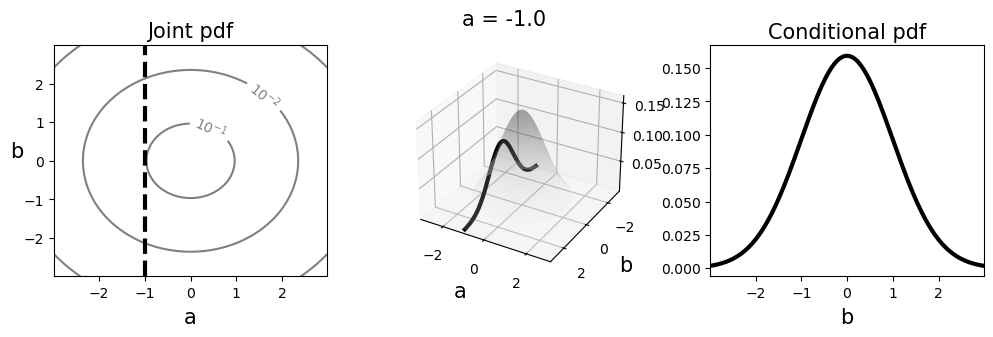

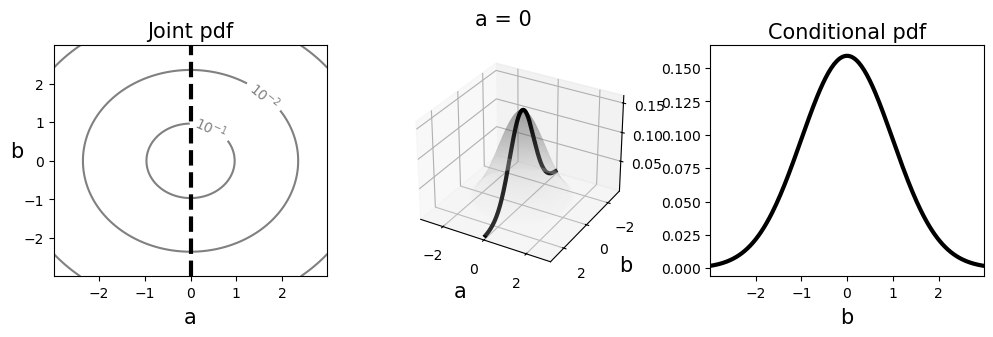

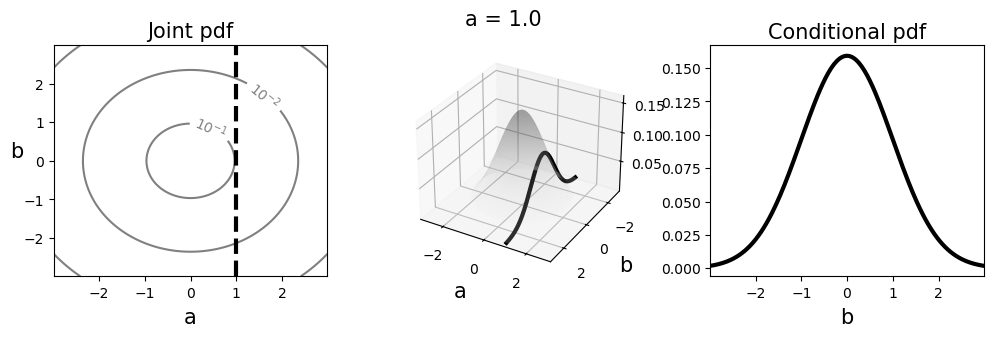

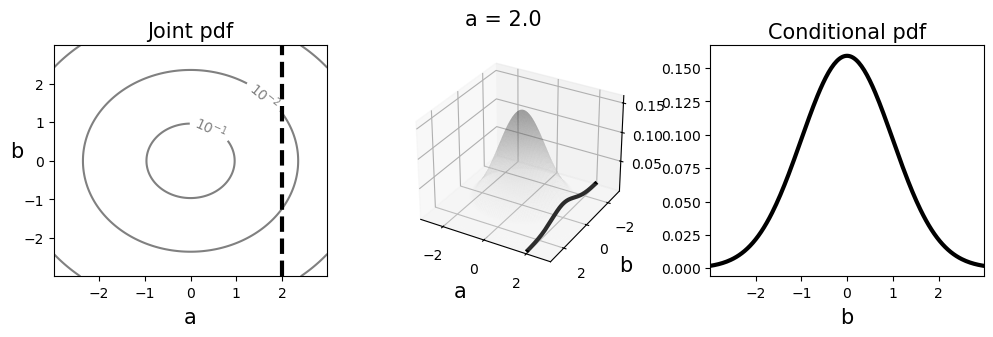

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
# matplotlib.rcParams['text.usetex'] = True
from mpl_toolkits.mplot3d import Axes3D

font_size = 15
font_size_ticks = 15

xmin = -2.99
xmax = 2.99
ymin = -2.99
ymax = 2.99
x = np.linspace(xmin, xmax, 200)
y = np.linspace(ymin, ymax,200)

def gaussian(x,y,rho):
    return (np.exp(-( x**2 - 2*rho*x*y + y**2)/2/(1-rho**2))
                  /(2 * np.pi * np.sqrt(1-rho**2)))

def gaussian_cond(x,y,rho):
    return (np.exp(-( (y-rho * x)**2 )/2/(1-rho**2))
                  /(2 * np.pi * np.sqrt(1-rho**2)))

X, Y = np.meshgrid(x, y)

rho = 0
level_list = [1e-30,1e-20,1e-10,1e-7,1e-4,1e-2,1e-1,0.25]
cond_vals = [-2.0,-1.0,0,1.0,2.0]

for ind,cond_val in enumerate(cond_vals):
    Z = gaussian(X, Y,rho)

    fig, axes = plt.subplots(1, 3, figsize=(12,3),width_ratios=[1,1,1])
    fig.suptitle(r"a = " + str(cond_val),fontsize=font_size,y = 1)

    CS = axes[0].contour(X, Y, Z, levels = level_list,colors='gray')
    fmt = {}
    strs = [r'$10^{-30}$',r'$10^{-20}$',r'$10^{-10}$',r'$10^{-7}$',r'$10^{-4}$',r'$10^{-2}$',r'$10^{-1}$','0.25']
    for l, s in zip(CS.levels, strs):
        fmt[l] = s
    axes[0].clabel(CS, inline=1,fmt=fmt)
    axes[0].vlines(cond_val,ymin,ymax,lw=3,ls="dashed",color="black")
    axes[0].set_xlabel("a", fontsize=font_size,labelpad=5)
    h = axes[0].set_ylabel("b", fontsize=font_size,labelpad=5)
    h.set_rotation(0)
    axes[0].set_ylim([ymin,ymax])
    axes[0].set_xlim([xmin,xmax])
    axes[0].set_title("Joint pdf",fontsize=font_size)
    
    axes[1].remove()
    ax1 = fig.add_subplot(1, 3, 2, projection='3d')
    z_cond = gaussian(cond_val, y,rho)
    ax1.plot_surface(X, Y, Z, rstride=1, cstride=3, cmap='Greys',alpha=0.2,edgecolor='none',rasterized=True)
    ax1.set_xticks([-2,0,2]) 
    ax1.set_yticks([-2,0,2])
    # ax1.zaxis.set_tick_params(labelsize=font_size_ticks,pad=20)
    ax1.plot(cond_val*np.ones(len(x)), y, z_cond,lw=3,color="black",alpha=1)
    ax1.set_ylim([ymax,ymin])
    ax1.set_xlim([xmin,xmax])
    ax1.set_ylabel('b',fontsize=font_size,labelpad=5)
    ax1.set_xlabel('a',fontsize=font_size,labelpad=5)
    
    axes[2].plot(y,gaussian_cond(cond_val,y,rho),color="black",lw=3)
    axes[2].set_xlim([xmin,xmax])
    axes[2].set_xlabel("b", fontsize=font_size,labelpad=5)
    axes[2].set_title(r"Conditional pdf", fontsize=font_size,pad=5);